# Life_Expectancy and GDP Analysis

This project will analyze data on GDP and Life_Expectancy from the World Health Organization and the World Bank to investigate if there is a correlation between the economic output of a country and the Life_Expectancy of its citizens.

The goal is to process the data, analyze the data using visualizations, and attempt to explain the findings.

Some of the questions that will be tackled in this project are:

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and Life_Expectancy of a country?
- What is the average Life_Expectancy in these nations?
- What is the distribution of that Life_Expectancy?

**Sources**
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.
- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import Data

First I'll import the inital modules to be used and import the data.

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

df = pd.read_csv('all_data.csv')

## Exploratory Data Analysis

To understand the data, here's a brief summary of the imported data using EDA functions in Python, such as `.info()` and `.value_counts()`.

In [18]:
print('-------------------Column Info-------------------')
print(df.info())

print('-------------------Countries-------------------')
print(df.Country.value_counts())

print('-------------------Years-------------------')
print(df.Year.value_counts())
print(f'\nThere are {len(df.Year.value_counts())} years entered in this DataFrame')

-------------------Column Info-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
-------------------Countries-------------------
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64
-------------------Years-------------------
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009   

The DataFrame consists of 96 entries with information on countries, years, life expectancy and GDP. Exploring the `Country` and `Year` columns, there are exactly 6 countries with 16 entries each, and 16 years with 6 entries each. 

Based on this one can suspect all countries are represented once in each of the 16 years, making up the 96 entries in total. I'll verify this assumption when visualizing the data.

Before verifying the assumption, I'll normalize the column and value names to simplify further manipulations and analysis.

In [19]:
df.replace("United States of America", "USA", inplace=True)
df.rename(columns = {'Life expectancy at birth (years)': 'Life_Expectancy'}, inplace=True)

Next, I'll plot the distribution of the unique values from the different columns, to see the representation of values in the data, along with some summary statistics about quantitative variables such as `GDP` and `Life_Expectancy`

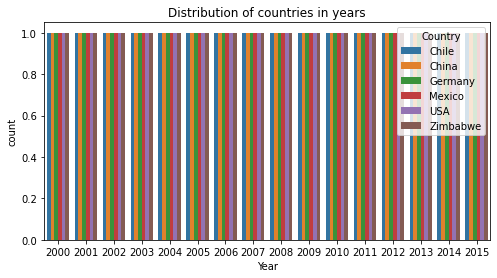

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize = (8,4))
sn.countplot(data = df, x = 'Year', hue = 'Country')
plt.title('Distribution of countries in years')
plt.show()
plt.clf()

The first barchart confirms that the countries are equally represented in each of the 16 years in the dataset (i.e. each country appears once per year).

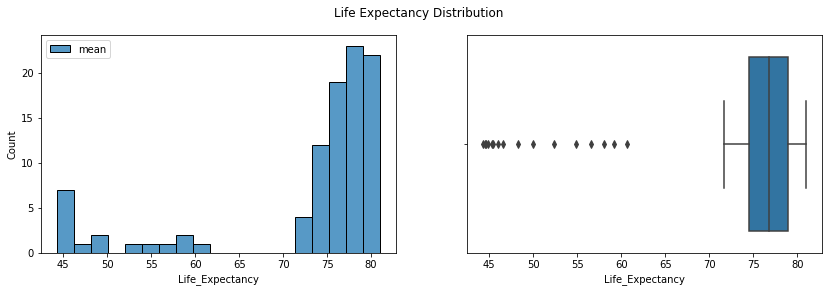

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life_Expectancy, dtype: float64


<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize = (14,4))
plt.suptitle('Life Expectancy Distribution')

plt.subplot(1,2,1)
sn.histplot(data = df, x = 'Life_Expectancy')
plt.legend(['mean'])

plt.subplot(1,2,2)
sn.boxplot(data = df, x = 'Life_Expectancy')
plt.show()
plt.clf()

print(df['Life_Expectancy'].describe())

The above histogram shows that the distribution for `Life_Expectancy` is left skewed, while the boxchart shows the composition of the values represented in the data. Most of life expectancy among the countries represented is found between 72 and 81 years.

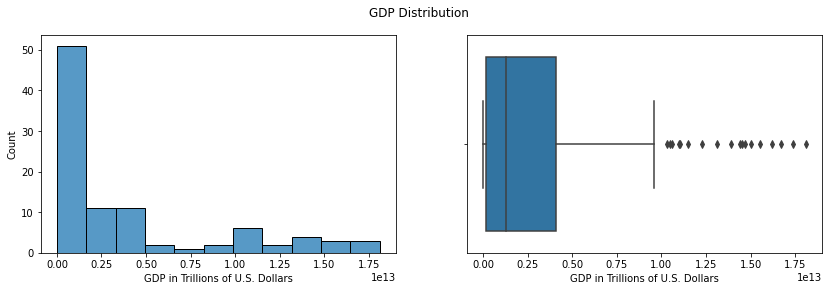

count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64


<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize = (14,4))
plt.suptitle('GDP Distribution')

plt.subplot(1,2,1)
plt.xlabel('GDP in Trillions of U.S. Dollars')
sn.histplot(data = df, x = 'GDP')

plt.subplot(1,2,2)
sn.boxplot(data = df, x = 'GDP')
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.show()
plt.clf()

print(df.GDP.describe())

The above histogram shows the contrary, right skewed data, while the boxchart indicates most of the GDPs represented range from 0.0004 to 0.9 trillion dollars.

## Analysis

In the following subsections I'll explore the relationships between the variables of this dataset, especially between the GDP and Life_Expectancy of six countries. 

### Life_Expectancy Distribution per Country
**Q:** How does life expectancy vary between the six countries?

    Country  Life_Expectancy
0   Germany         79.65625
1     Chile         78.94375
2       USA         78.06250
3    Mexico         75.71875
4     China         74.26250
5  Zimbabwe         50.09375


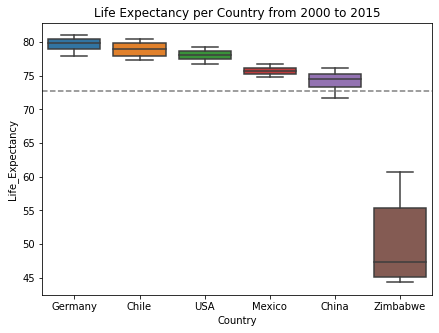

Life expectancies for Chile, China, Germany, Mexico and the US: 
Mean: 50.09 
Standard deviation: 2.27

Life Expectancy for Zimbabwe: 
Mean: 77.33 
Standard deviation: 5.94


In [23]:
import statistics as st

group_lf = df['Life_Expectancy'].groupby(df.Country).mean().sort_values(ascending = False).reset_index()
print(group_lf)

plt.figure(figsize = (7,5))
plt.title('Life Expectancy per Country from 2000 to 2015')
sn.boxplot(data = df, x = 'Country', y = 'Life_Expectancy', order = group_lf.Country)
plt.axhline(np.mean(df['Life_Expectancy']), linestyle = '--', color = 'grey')
locs, labels=plt.xticks()
plt.show()

mean_lf_no_Z = st.mean(group_lf['Life_Expectancy'][0:5])
std_lf_no_Z = st.stdev(group_lf['Life_Expectancy'][0:5])
mean_Z = st.mean(df.loc[df.Country == 'Zimbabwe']['Life_Expectancy'])
std_Z = st.stdev(df.loc[df.Country == 'Zimbabwe']['Life_Expectancy'])

mean_lf_no_Z = np.mean(group_lf['Life_Expectancy'][0:5])
mean_Z = np.mean(group_lf.iloc[[5]]['Life_Expectancy'])

print('Life expectancies for Chile, China, Germany, Mexico and the US:',
        f'\nMean: {round(mean_Z, 2)}',
        f'\nStandard deviation: {round(std_lf_no_Z, 2)}')

print('\nLife Expectancy for Zimbabwe:',
        f'\nMean: {round(mean_lf_no_Z, 2)}',
        f'\nStandard deviation: {round(std_Z, 2)}')

**A:** Germany, Chile, USA, Mexico and China have the highest life expectancies in the dataset, while Zimbabwe has the lowest. This confirms that the Zimbabwe forms the outlier observed in the above EDA.

### GDP Distribution per Country
**Q:** How does GDP vary among the countries listed? 

    Country           GDP
0       USA  1.407500e+13
1     China  4.957714e+12
2   Germany  3.094776e+12
3    Mexico  9.766506e+11
4     Chile  1.697888e+11
5  Zimbabwe  9.062580e+09


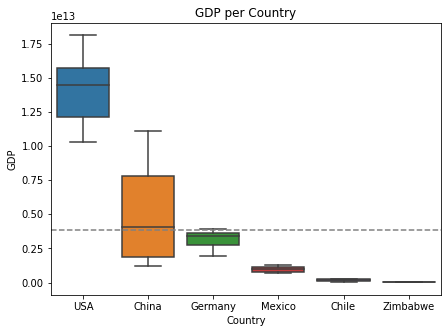

GDP for the US: 
Mean: 14T 
Standard deviation: 2.43T

GDP for China and Germany: 
Mean: 4.03T 
Standard deviation: 1.32T

GDP for Mexico, Chile and Zimbabwe: 
Mean: 385.17B 
Standard deviation: 518.51B


In [24]:
import statistics as st

group_gdp = df['GDP'].groupby(df.Country).mean().sort_values(ascending = False).reset_index()
print(group_gdp)

plt.figure(figsize = (7,5))
plt.title('GDP per Country')
sn.boxplot(data = df, x = 'Country', y = 'GDP', order = group_gdp.Country)
plt.axhline(np.mean(df.GDP), linestyle = '--', color = 'grey')
locs, labels=plt.xticks()
plt.show()

mean_gdp_usa = st.mean(df.loc[df.Country == 'USA']['GDP'])/1e12
std_gdp_usa = st.stdev(df.loc[df.Country == 'USA']['GDP'])/1e12

mean_gdp_middle = st.mean(group_gdp['GDP'][1:3])/1e12
std_gdp_middle = st.stdev(group_gdp['GDP'][1:3])/1e12

mean_gdp_low3 = st.mean(group_gdp['GDP'][3:])/1e9
std_gdp_low3 = st.stdev(group_gdp['GDP'][3:])/1e9

print('GDP for the US:',
        f'\nMean: {round(mean_gdp_usa)}T',
        f'\nStandard deviation: {round(std_gdp_usa, 2)}T')

print('\nGDP for China and Germany:',
        f'\nMean: {round(mean_gdp_middle, 2)}T',
        f'\nStandard deviation: {round(std_gdp_middle, 2)}T')

print('\nGDP for Mexico, Chile and Zimbabwe:',
        f'\nMean: {round(mean_gdp_low3, 2)}B',
        f'\nStandard deviation: {round(std_gdp_low3, 2)}B')

**A:** The data can be split into three groups based on the spread and central tendencies of the GDPs per country, as outlined in the above code. The follow up question would be, are there any characteristics in the dataset that explain the existence of these three groups, which I'll explore in the remaining sections.

### GDP ~ Life Expectancy Correlation
The final relationship to explore is the correlation betwen GDP and Life Expectancy among the six countries. For this, I'll first use a heat map to explore the value and magnitud of the correlations per country.

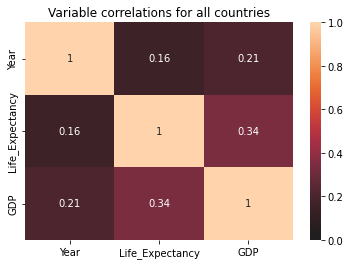

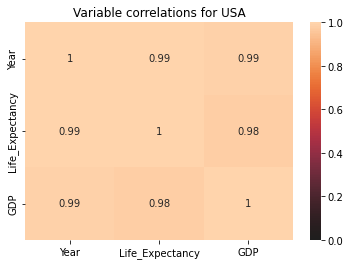

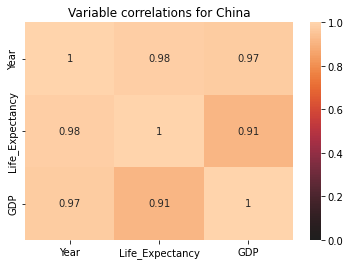

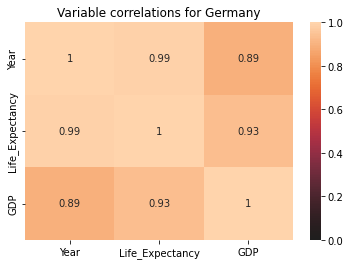

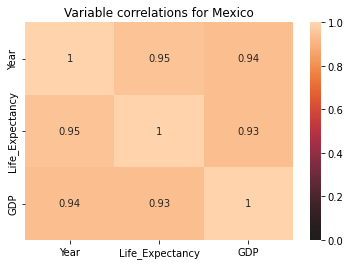

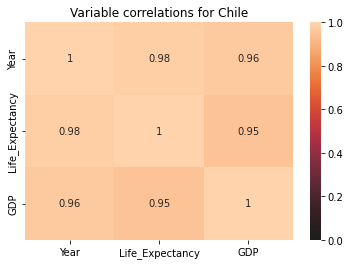

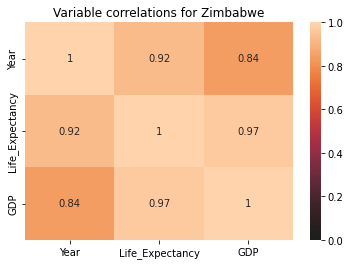

<Figure size 432x288 with 0 Axes>

In [25]:
sn.heatmap(df.corr(), center=0, robust=True, annot=True, vmin = 0, vmax = 1)
plt.title('Variable correlations for all countries')
plt.show()
plt.clf()

for country in group_gdp.Country:
    sn.heatmap(df.loc[df.Country == country].corr(), center=0, robust=True, annot=True, vmin = 0, vmax = 1)
    plt.title('Variable correlations for ' + country)
    plt.show()
    plt.clf()

The heat map shows that for countries overall, variables are not correlated. This might be due to the fact that the variables, especially life expectancy and GDP, vary greatly among the countries in the dataset. However, when analyzing the correlations based on country, all variables seem to have strong positive correlations. The variances among correlation coeficients might be due to country internal characteristics, beyond the scope of the dataset.

How the correlations vary between countries is what I'll plot in the following section.

#### Scatterplots

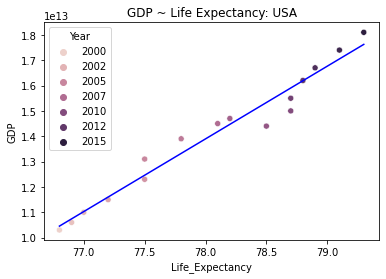

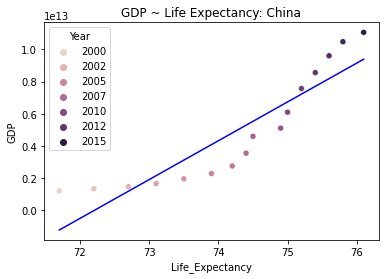

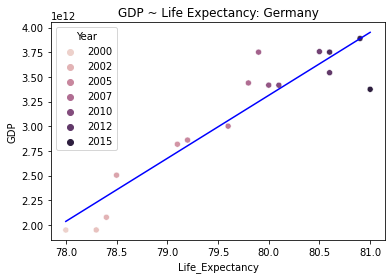

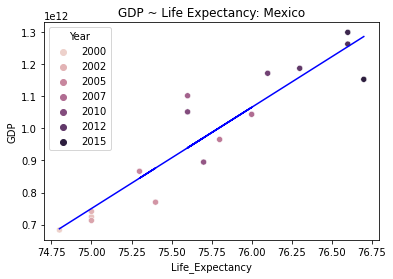

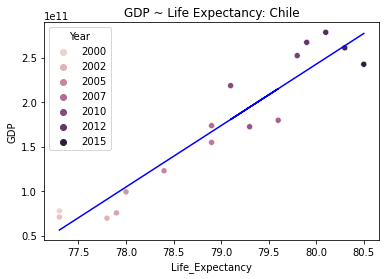

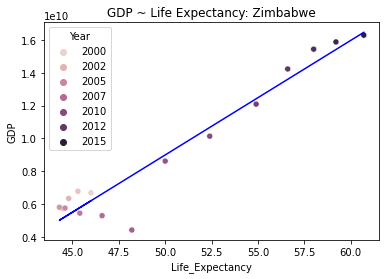

<Figure size 432x288 with 0 Axes>

In [26]:
import statsmodels.api as sm

for country in group_gdp.Country:
    sn.scatterplot(data = df[df.Country == country], x = 'Life_Expectancy', y = 'GDP', hue='Year')
    model = sm.OLS.from_formula('GDP ~ Life_Expectancy', df[df.Country == country]).fit()
    plt.plot(df[df.Country == country]['Life_Expectancy'], model.predict(df[df.Country == country]), color='blue')
    plt.title(f'GDP ~ Life Expectancy: {country}')
    plt.show()
    plt.clf()

All scatterplots show a positive correlation between life expectancy and a country's GDP (although by no means the order or combination of these two variables imply causality).

From all the visualizations seen so far, it's clear to see the tendencies and behavior of different relationships and correlations. Below is a summary of the visualizations by country.

## Summary of Life Expectancies and GDP for Six Countries: 2000 - 2015

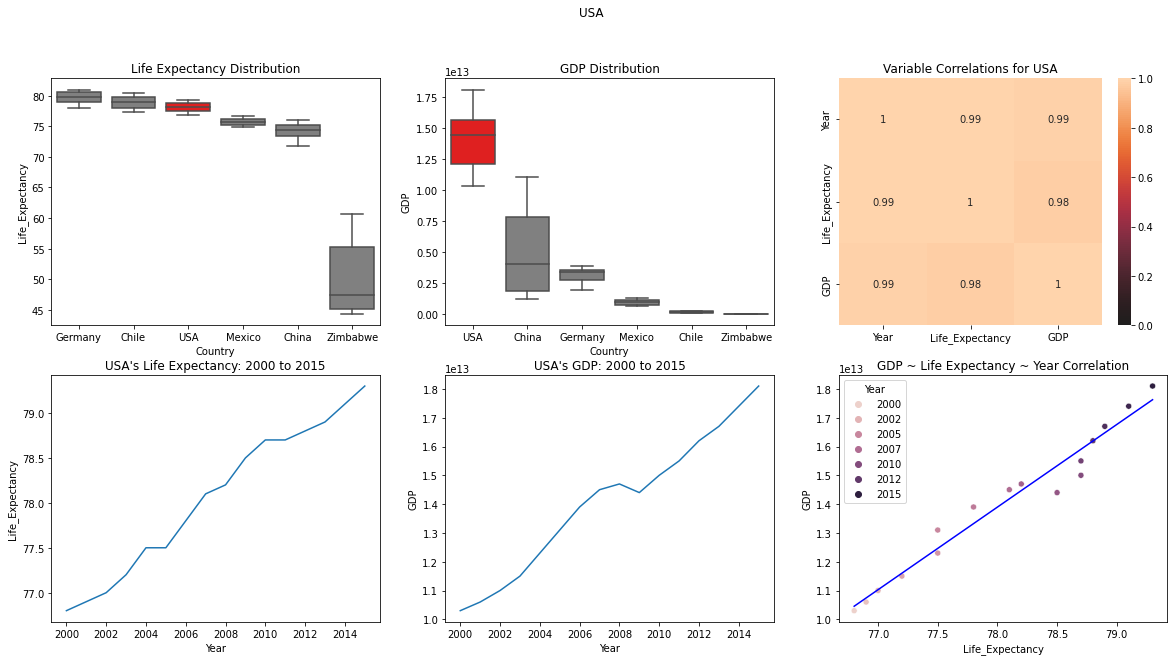

<Figure size 432x288 with 0 Axes>

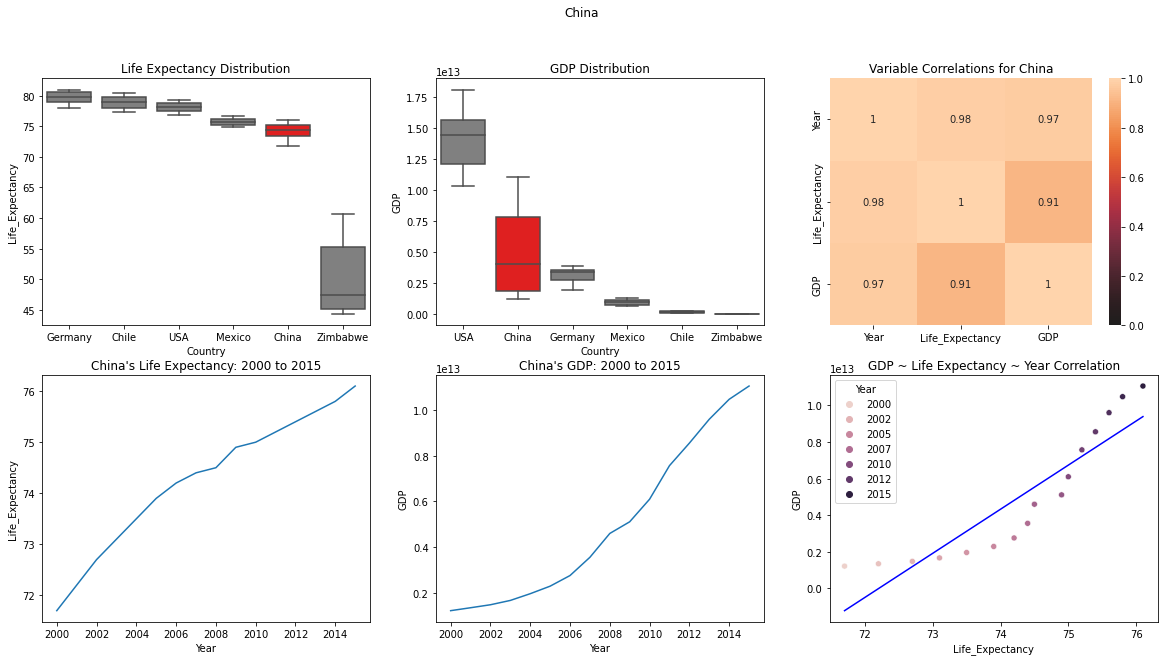

<Figure size 432x288 with 0 Axes>

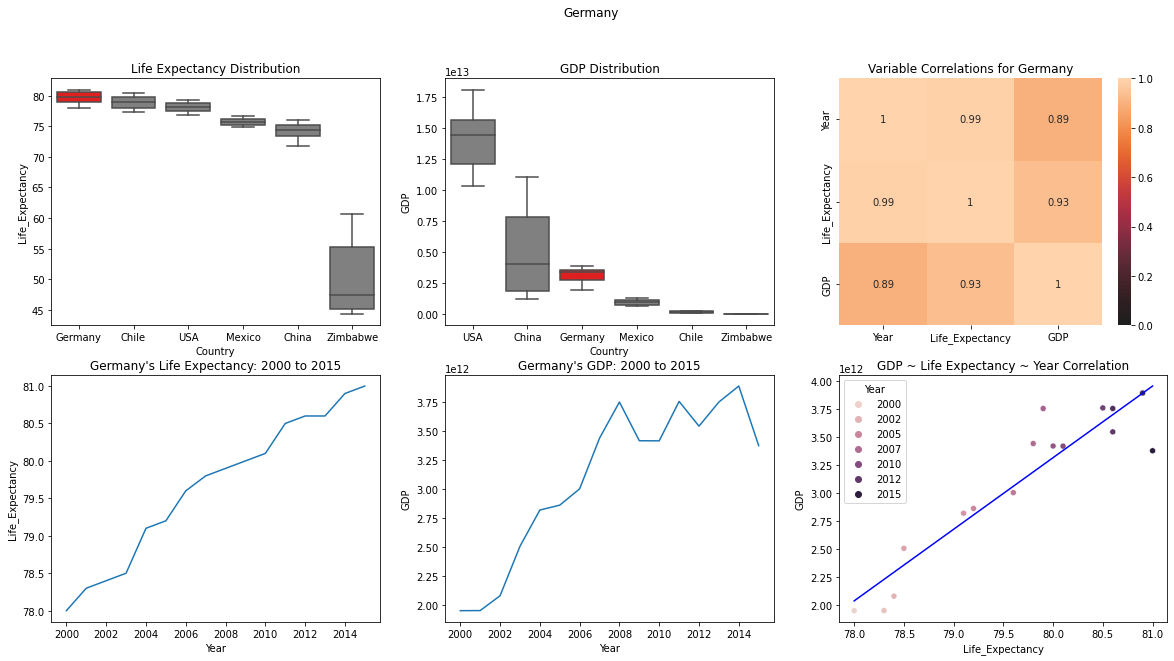

<Figure size 432x288 with 0 Axes>

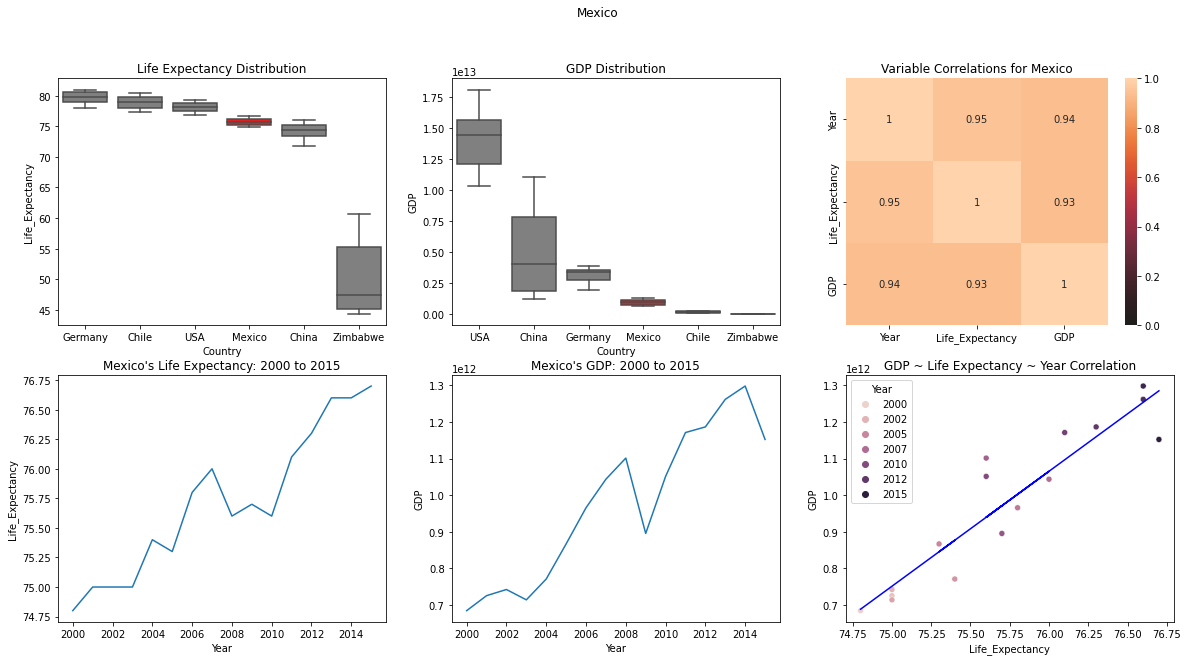

<Figure size 432x288 with 0 Axes>

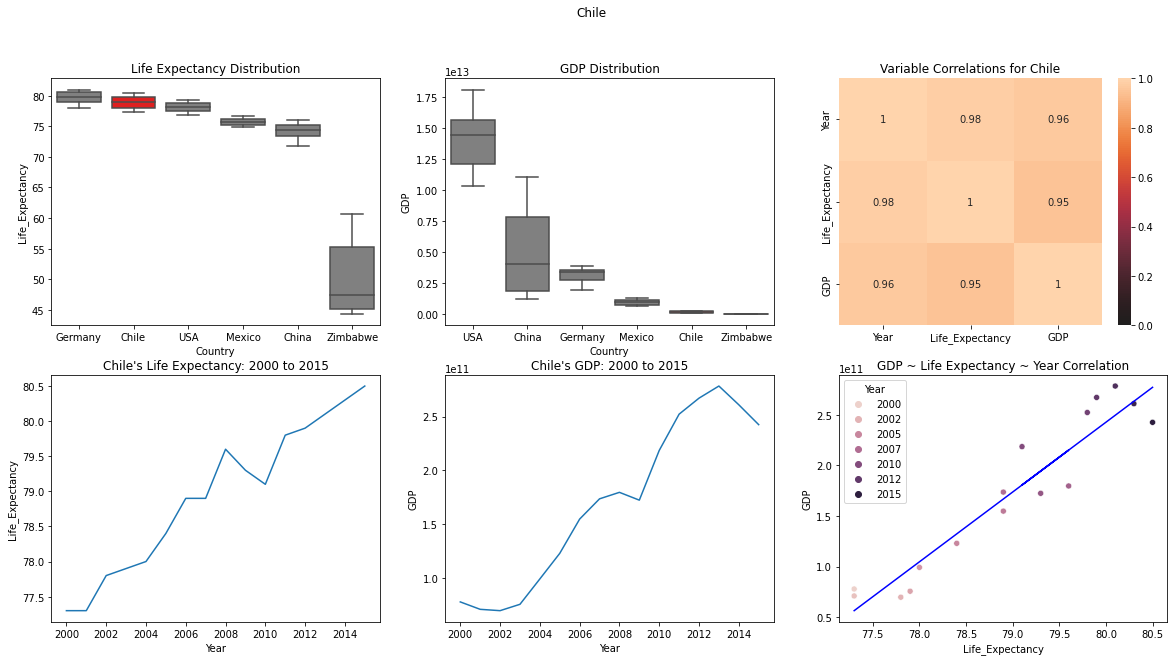

<Figure size 432x288 with 0 Axes>

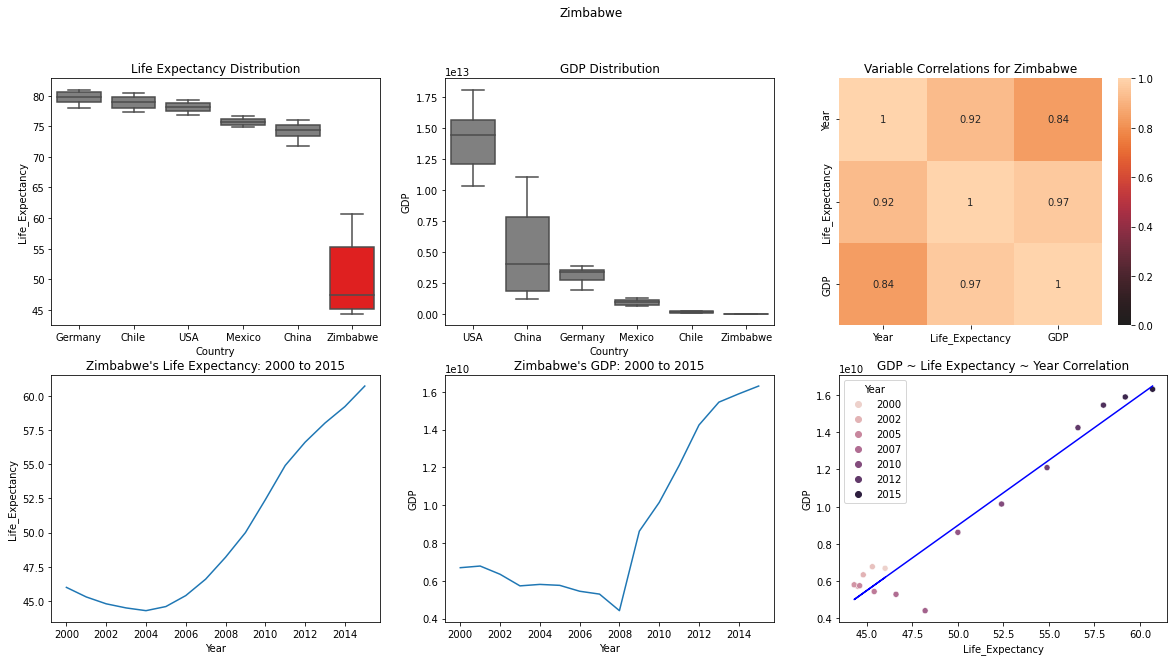

<Figure size 432x288 with 0 Axes>

In [32]:
for country in group_gdp.Country:
    my_pal = {land: 'grey' if not land == country else "red" for land in df.Country.unique()}

    plt.figure(figsize = (20,10))
    plt.suptitle(country)

    plt.subplot(2,3,1)
    plt.title(f'Life Expectancy Distribution')
    sn.boxplot(data = df, x = 'Country', y = 'Life_Expectancy', order = group_lf.Country, palette = my_pal)

    plt.subplot(2,3,2)
    plt.title(f'GDP Distribution')
    sn.boxplot(data = df, x = 'Country', y = 'GDP', order = group_gdp.Country, palette = my_pal)
    locs, labels=plt.xticks()

    plt.subplot(2,3,3)
    plt.title(f'Variable Correlations for {country}')
    sn.heatmap(df.loc[df.Country == country].corr(), center=0, robust=True, annot=True, vmin = 0, vmax = 1)

    plt.subplot(2,3,4)
    plt.title(f'{country}\'s Life Expectancy: 2000 to 2015')
    sn.lineplot(data = df.loc[df.Country == country], x = 'Year', y = 'Life_Expectancy')
    
    plt.subplot(2,3,5)
    plt.title(f'{country}\'s GDP: 2000 to 2015')
    sn.lineplot(data = df.loc[df.Country == country], x = 'Year', y = 'GDP')
    
    plt.subplot(2,3,6)
    sn.scatterplot(data = df[df.Country == country], x = 'Life_Expectancy', y = 'GDP', hue='Year')
    model = sm.OLS.from_formula('GDP ~ Life_Expectancy', df[df.Country == country]).fit()
    plt.plot(df[df.Country == country]['Life_Expectancy'], model.predict(df[df.Country == country]), color='blue')
    plt.title('GDP ~ Life Expectancy ~ Year Correlation')

    plt.subplots_adjust(wspace = 0.2)
    
    plt.show()
    plt.clf()

## Conclusion of Findings

This project made multiple visualizations with the data from 96 rows and 4 columns. These visualizations offered an answer to the questions introduced above, and were discussed in the previous analysis. Here is a recap of the answers:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.